In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

In [10]:
lam=np.loadtxt(f"dphi0p5_no_sa/lam.csv")
n_param=len(lam)
with h5py.File("dphi0p5_no_sa/coord.h5", 'r+') as f:
    umb_field=np.array(f["umbrella_field"])
    lxyz=np.array(f['parameter/lxyz'])

n_target=len(umb_field[umb_field>0])
print(n_target)

1600


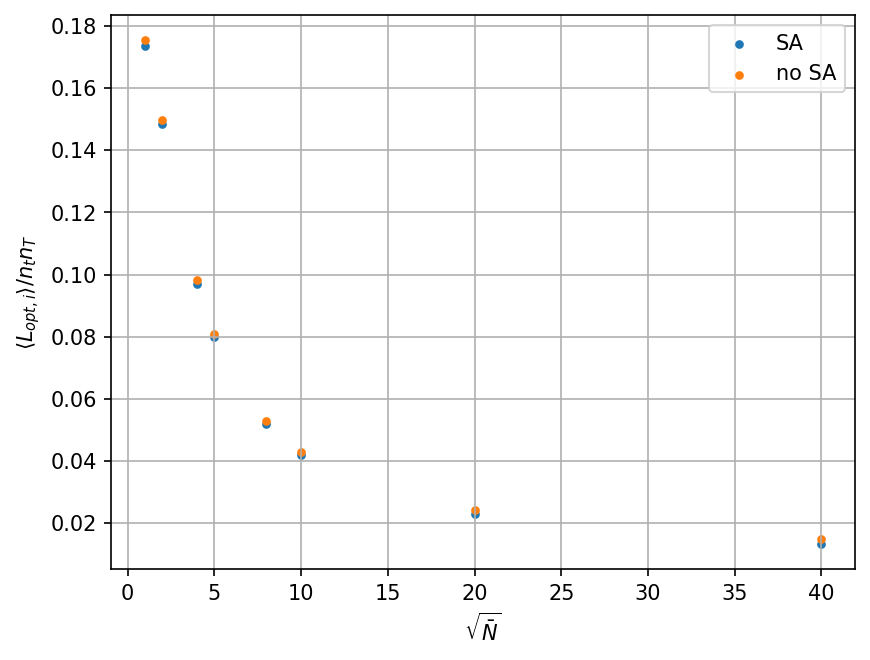

In [11]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\sqrt{\bar N}$")
plt.ylabel(r"$\langle L_{opt,i}\rangle/n_tn_T$")
dphi="dphi0p5"
directory_sa=dphi+"_sa"
directory_no_sa=dphi+"_no_sa"
#number of different parameters
opt_sa=np.loadtxt(f"{directory_sa}/opt.csv")/n_target
flips_sa=np.loadtxt(f"{directory_sa}/flips.csv")
#number of simulations per parameter
n_sim=int(len(opt_sa)/n_param)
opt_no_sa=np.loadtxt(f"{directory_no_sa}/opt.csv")/n_target
flips_no_sa=np.loadtxt(f"{directory_no_sa}/flips.csv")
#reshape arrays
opt_sa=opt_sa.reshape(n_param,n_sim).mean(axis=1)
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
flips_sa=flips_sa.reshape(n_param,n_sim).mean(axis=1)
flips_no_sa=flips_no_sa.reshape(n_param,n_sim).mean(axis=1)
plt.scatter(lam,opt_sa,s=10,label="SA")
plt.scatter(lam,opt_no_sa,s=10,label="no SA")
plt.legend()
plt.savefig(f"opt_var_nbar_{dphi}.pdf")

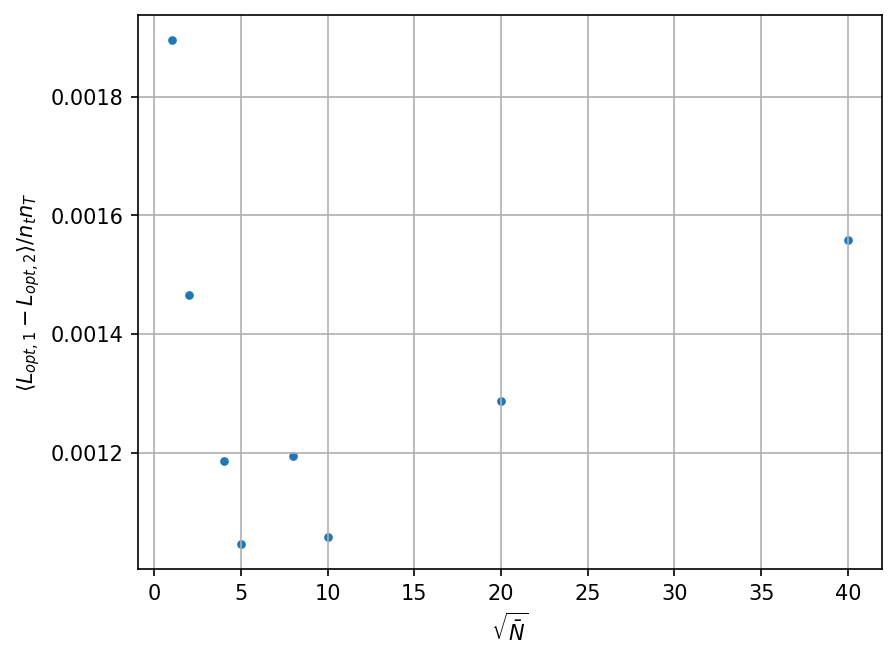

In [14]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\sqrt{\bar N}$")
plt.ylabel(r"$\langle L_{opt,1}-L_{opt,2}\rangle/n_tn_T$")
plt.scatter(lam,(opt_no_sa-opt_sa),s=10)
plt.savefig(f"diff_var_nbar_{dphi}.pdf")

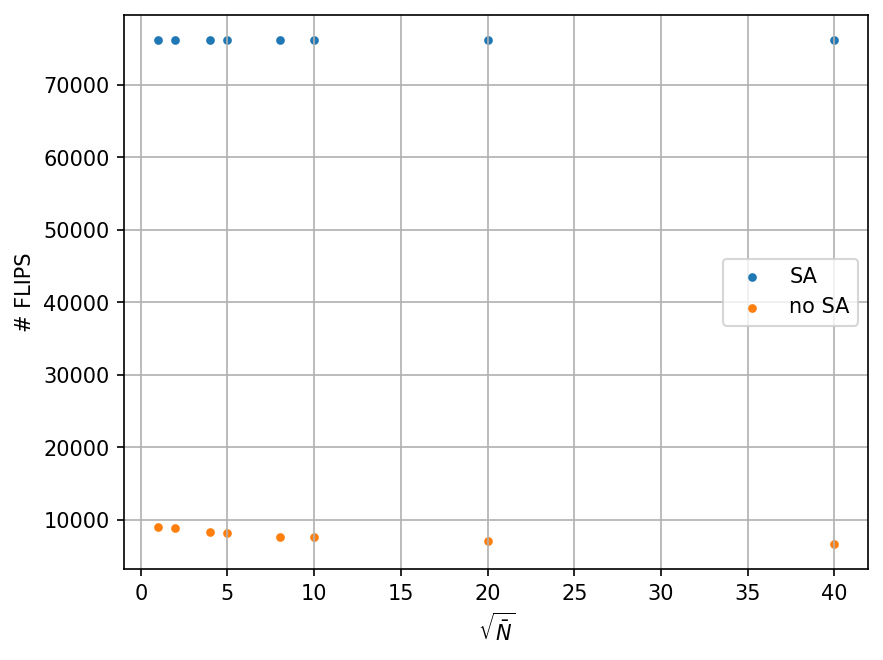

In [13]:
plt.figure(dpi=150)
plt.grid()
plt.ylabel("# FLIPS")
plt.xlabel(r"$\sqrt{\bar N}$")
plt.scatter(Nbar,flips_sa,s=10,label="SA")
plt.scatter(Nbar,flips_no_sa,s=10,label="no SA")
plt.legend()
plt.savefig(f"flips_var_nbar_{dphi}.pdf")